<a href="https://colab.research.google.com/github/youngjooo/Biomedical-Image-Processing/blob/main/Thesis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **[Python code]**

* 논문 주제 : 다중 출력 회귀 및 분류를 이용한 알츠하이머병 종적 진화 예측
* 작성자 : 박영주

---

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(0)

**Load TADPOLE* dataset (csv file) from Google Drive**
-------------------------------------------------------
*The Alzheimer's Disease Prediction Of Longitudinal Evolution
(https://tadpole.grand-challenge.org/)

### -Subjects: 1363 (1090 Train (80%) + 273 Test (20%))


### -Features: 75
*   2 demographic feature: MMSE, ADAS13
*   70 mean values of cortical thickness
*   3 etc: RID, DXCHANGE, AGE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

csv_file_train = '/content/gdrive/MyDrive/Colab Notebooks/ad_data.csv'  # Set file path
original_data = pd.read_csv(csv_file_train)
original_data

# DXCHANGE: clinical label (1-CN, 2-MCI, 3-AD)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,RID,DXCHANGE,AGE,MMSE,ADAS13,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,4084,1,68.4,30,10.00,2.700,2.635,2.613,2.904,2.311,1.647,2.139,2.652,2.604,2.480,3.095,2.144,2.792,2.207,2.903,2.617,4.117,2.701,,3.127,3.051,2.305,2.872,2.732,2.026,3.756,2.813,2.762,2.556,2.916,2.695,2.259,2.690,2.017,2.421,2.949,2.570,2.370,2.674,3.004,2.369,1.599,2.208,2.650,2.739,2.544,3.018,2.377,2.880,2.322,2.657,2.489,3.620,2.711,,2.593,2.792,2.660,1.993,3.734,2.390,2.817,2.471,2.990,2.667,2.490,2.523,2.254,2.171,2.862
1,2196,2,68.2,30,13.00,2.453,2.992,2.470,2.965,2.438,1.584,1.910,2.900,2.451,2.335,2.771,2.354,2.712,2.001,2.729,2.363,3.613,2.475,,3.196,3.334,2.343,2.729,2.627,1.742,3.383,2.647,2.758,2.394,2.634,2.334,2.241,2.824,1.865,2.383,2.866,2.334,2.793,2.413,2.874,2.316,1.478,1.909,2.780,2.589,2.133,3.036,2.329,2.687,2.070,2.783,2.594,3.405,2.367,,2.582,2.977,2.489,1.868,3.220,2.683,2.569,2.372,2.854,2.867,2.233,2.793,1.987,2.428,2.943
2,657,1,77.7,29,15.33,2.249,2.296,2.315,2.681,2.420,1.386,1.830,2.466,2.3

In [ ]:
# original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 75 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   RID                                          1363 non-null   int64  
 1   DXCHANGE                                     1363 non-null   int64  
 2   AGE                                          1363 non-null   float64
 3   MMSE                                         1363 non-null   int64  
 4   ADAS13                                       1353 non-null   float64
 5   ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16  1363 non-null   float64
 6   ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16  1363 non-null   float64
 7   ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16  1363 non-null   float64
 8   ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16  1363 non-null   float64
 9   ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16  1363 non-null   float64
 10  

In [ ]:
train_data, test_data = train_test_split(original_data, test_size=0.2)

# 1090 train / 273 test

---
# **Refine data & EDA**




1.   변수 제거 : RID 
2.   데이터 시각화 
3.   결측치 처리 : 행/열 제거
4. 레이블 분리 : X / y_reg / y_cls
5. 정규화
---







In [ ]:
# 데이터 COPY 해놓기
## 원본 데이터에 손상이 가지않도록 COPY한 후 분류하는 것이 더 좋다.


train = train_data.copy()

In [ ]:
# train_data info
# dtypes: float64(70), int64(3), object(2)

# print(train.info())

In [ ]:
# object -> float


train.replace(' ', np.nan, inplace = True)
train['ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'] = train['ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'].astype('float')
train['ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'] = train['ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'].astype('float')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 1088 to 684
Data columns (total 75 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   RID                                          1090 non-null   int64  
 1   DXCHANGE                                     1090 non-null   int64  
 2   AGE                                          1090 non-null   float64
 3   MMSE                                         1090 non-null   int64  
 4   ADAS13                                       1085 non-null   float64
 5   ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16  1090 non-null   float64
 6   ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16  1090 non-null   float64
 7   ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16  1090 non-null   float64
 8   ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16  1090 non-null   float64
 9   ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16  1090 non-null   float64
 10

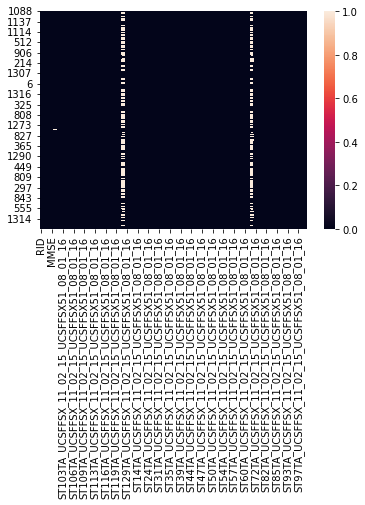

In [ ]:
import seaborn as sns
%matplotlib inline

sns.heatmap(train.isnull(), cbar = True)

## Check-point : 01
> info()를 사용하여 주어진 데이터가 어떤 데이터인지 알아보았다.
첫째로 결측치를 확인하였고, 둘째로 데이터 형을 알아보았다.

> 결측치가 있는 변수는 총 5개였으며, 각각의 결측치는 1개에서 많게는 700개 이상의 결측치를 가지고 있었다. 이 중 결측치가 유독 많은 변수(724개의 결측치)는 object형을 자료형을 가지고 있는 것을 확인했다.

> 이 결과를 보고 결측치가 많은 변수(2개의 변수)는 결측치의 수가 반 이상이므로 열을 삭제하는 1순위로 생각했다. 

> 그래서 변수를 삭제하기 이전 해당 열은 예측하고자 하는 값들(regression & class label)과 얼마나 상관관계가 있는지 시각적으로 확인하고자 object -> float로 형 변환을 하였다. 

## **01 : 불필요한 변수 제거**

* RID 변수 제거

In [ ]:
## train_data 의 RID 변수(열 전체)를 지운다. 

train.drop("RID", axis = 1, inplace = True)

> RID 변수는 알츠하이머 데이터의 각 환자별 id값이라는 판단을 하였습니다. 또한 해당 변수는 예측 및 분류에 쓰이지 않기 때문에 삭제하였습니다.

##**02 : 데이터 시각화**


* 산점도 행렬 : 특성 간의 상관관계
* 상관관계 행렬 : 변수 간의 선형관계

산점도 행렬

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


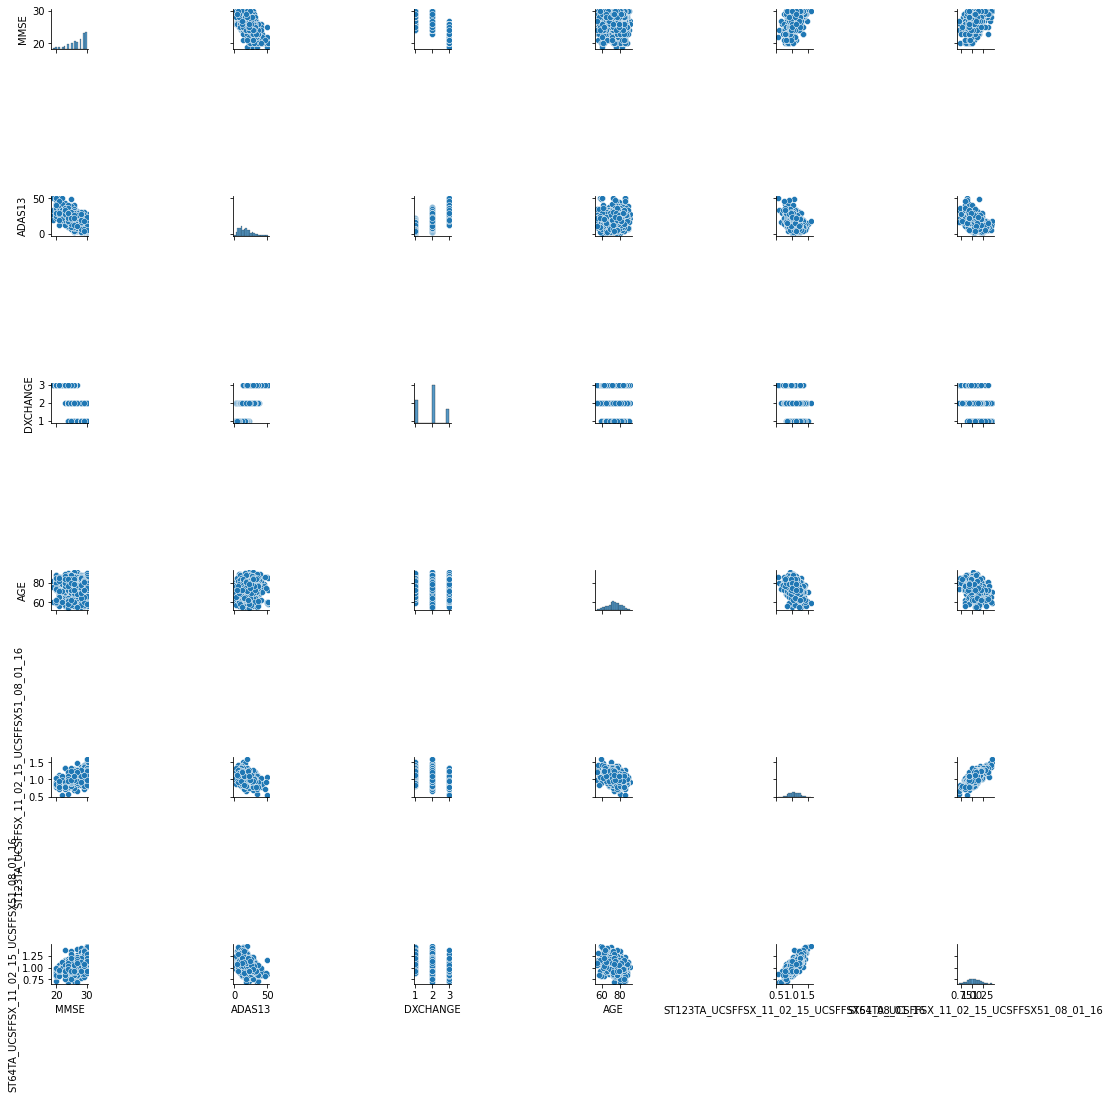

In [ ]:
import seaborn as sns

cols = ["MMSE", "ADAS13", "DXCHANGE", "AGE",'ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
                    'ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16']
sns.pairplot(train[cols], height = 2.5)
plt.tight_layout()
plt.show()

상관관계 행렬

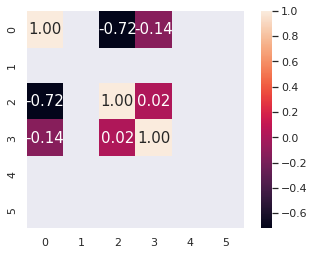

In [ ]:
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size': 15})
#plt.tight_layout()
plt.show()

### Check-point : 02

* 산점도 행렬
> 결측치가 많은 변수들을 삭제하기 이전에 해당 변수가 레이블과 어떤 관계가 있나를 먼저 살펴보았다.

 > 그 결과, 결측치를 많이 가진 두 변수 사이에는 높은 상관관계를 가지고 있었다. 반면에, 회귀 레이블과 클래스 레이블은 다소 높지 않은 상관관계를 가지고 있기 때문에 삭제해도 괜찮겠다는 판단을 하였다.

 > 하지만 회귀 레이블 중 ADAS13과 회귀 레이블 DXCHANGE 간의 상관관계가 존재하기 때문에 클래스 레이블을 제외한 X train data를 사용하여 계산하였을 시 정확도가 높지 않을 것으로 예상이 된다.


* 상관관계 행렬 
> 위 표에서 1, 4, 5 는 결측치를 가지고 있는 변수이기 때문에 corr가 계산되지 않았다. 하지만 나머지들을 살펴보았을 때 0과 2 사이에 -0.73으로 높은 음의 선형관계를 가지고 있다고 할 수 있다.
  
  > 따라서 위 그래프와 마찬가지로 클래스 레이블을 제외한 X trian data로 회귀를 계산하였을 시 정확도가 높지 않을 것이라 예상된다.

##**03 : 결측치 처리**
1. object type을 flaot type으로 형 변환
2. 결측치를 가지고 있는 행/열 지우기


--



**check missing values**
* ADAS13 (10)
* ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16 (724)
* ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16 (724)
* ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16 (1)
* ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16 (1)

In [ ]:
train.dropna(axis = 0, inplace = True, subset = ['ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 
                                                 'ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 
                                                 'ADAS13'])

In [ ]:
train = train.drop(['ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
                    'ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'], axis = 1)

In [ ]:
# train.info()

### Check-point : 03

> 위의 시각화 자료를 통해 변수를 삭제해도 괜찮겠다는 판단을 하였다. 
 
 > 먼저 하나의 결측치를 가진 변수는 동일한 행에서 결측치를 가지고 있기 때문에 행을 삭제하였다. 또한 ADAS13(회귀 예측 레이블)은 10개의 결측치를 가지고 있는데 총 1707개의 행 중 10개를 삭제해도 무방할거 같다는 생각으로 삭제하였다.

 > 변수의 반 이상이 결측치인 열은 채워넣으면 데이터의 본래 성질을 흐릴거 같다는 판단과 시각화 자료를 통해 두 변수끼리는 높은 상관관계를 갖지만 반응 변수와는 다소 높지 않은 상관관계를 가지고 있기에 열 전체를 삭제하였다. 

##**04 : 레이블 분리**
* 회귀용 : MMSE, ADAS13
* 분류용 : DXCAHNGE

In [ ]:
data = train.copy()

*회귀 레이블 분리*




In [ ]:
X = data.drop(["MMSE", "ADAS13", "DXCHANGE"], axis = 1, inplace = False)
y_reg = data[["MMSE", "ADAS13"]].copy()

*분류 레이블 분리*

In [ ]:
y_cls = data[["DXCHANGE"]].copy()

### Check-point : 04

* 회귀 레이블
> 회귀를 통해 구해야 하는 값이 총 2개인데, 수행하고자 하는 연구가 'Multi-output regression'으로 다중 출력 회귀 분석이기 때문에 한번에 두 가지의 Y(종속 변수)를 구하고자 y_reg로 레이블을 분리하였다.


* 분류 레이블
> 분류를 통해 구해야 하는 값은 1개이다. 데이터의 구성이 정수(1,2,3)로 레이블이 설정되어 있다. 

 > 하지만 이 레이블은 순서가 있는 것이 아니기 때문에 dummy 변수를 만들어 0과 1의 값으로 다시 표현해주었다. 이것은 아래 multi-out classification에서 표현해 줄 것이다. 

##**05 : 정규화**

In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

In [ ]:
X

,AGE,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
1088,62.8,2.157,2.518,2.309,2.731,2.189,1.429,1.674,2.429,2.046,2.100,3.138,2.106,2.455,1.766,2.591,2.316,3.297,2.054,3.049,2.981,2.438,2.929,2.271,1.687,3.675,2.739,2.651,2.207,2.749,2.532,1.852,2.649,1.769,2.385,2.770,2.183,2.829,2.397,2.746,2.226,1.523,1.753,2.634,1.970,2.052,2.936,2.311,2.487,1.848,2.604,2.231,3.346,1.930,2.367,2.747,2.247,1.623,3.561,2.516,2.615,2.124,2.620,2.627,1.950,2.640,1.904,2.436,2.725
921,76.8,1.844,2.856,2.040,2.591,2.160,1.582,1.659,2.318,1.917,2.059,2.565,1.940,2.219,1.809,2.523,2.182,4.031,2.230,2.708,2.760,2.312,2.733,2.165,1.539,3.542,2.107,2.527,1.899,2.705,2.595,2.021,2.229,1.863,2.031,2.595,1.913,2.947,2.121,2.234,2.189,1.541,1.730,2.303,1.888,1.982,2.910,2.173,2.284,1.707,2.299,2.163,2.893,1.928,2.132,2.364,1.971,1.693,3.214,2.402,2.536,2.109,2.564,2.195,2.170,2.363,2.015,2.224,2.560
1335,80.0,1.899,2.258,2.203,2.298,2.228,1.317,1.650,2.312,2.064,2.057,2.393,1.982,2.088,1.729,2.184,2.123,2.650,2.022,2.300,2.514,1.698,2.581,1.764,1.539,2.151,2.166,2.060,1.767,1.852,1.996,1.784,2.065,1.552,1.897,1.

### Check-point : 05

> 데이터의 각 변수별 단위가 동일하지 않을 수 있다 생각하여 특성 스케일을 맞춰주었다.

 > 랜덤 포레스트 등에서는 이렇게 해줄 필요가 없지만 선형 회귀 등에서는 더 높은 정확도를 위해 필요한 과정이기에 스케일을 맞춰주었다. 

---
# **Task 1**
* Multi-output Regression (다중 출력 회귀)
---


##**모델 적용 - 선형**
* LinearRegression
* 규제 적용

Linear Regression

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

mlr = MultiOutputRegressor(LinearRegression())

mlr.fit(X_std, y_reg)
y_mlr_pred = mlr.predict(X_std)

In [ ]:
## 평균 오차 제곱

from sklearn.metrics import mean_squared_error
print('훈련 MSE : %.3f' %mean_squared_error(y_reg, y_mlr_pred))
print('\n')

## 결정 계수

from sklearn.metrics import r2_score
print('훈련 R2 : %.3f' %r2_score(y_reg, y_mlr_pred))

훈련 MSE : 23.917


훈련 R2 : 0.443


> 먼저 레이블을 두 개 나눴을 때 각 출력값들의 MSE와 R_2의 값은 위와 같이 나왔다. 
R^2를 성능 지표로 하였을 때 선형 회귀는 대하여 약 44%의 설명력을 가지고 있다고 할 수 있다. 

 > 평균 오차 제곱(MSE) 값은 약 24가 나왔다.



In [ ]:
## reg pipeline

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        MultiOutputRegressor(LinearRegression()))

pipe_lr.fit(X_std, y_reg)
lr_scores = cross_val_score(estimator = pipe_lr,
                         X = X_std,
                         y = y_reg,
                         cv = 10,
                         n_jobs = -1)

In [ ]:
print('cv 정확도 점수 : %s' %lr_scores)
print('cv 정확도 : %.3f +/- %.3f' %(np.mean(lr_scores), np.std(lr_scores)))

cv 정확도 점수 : [0.40715374 0.24393163 0.36540489 0.45650136 0.33942275 0.37470954
 0.39340582 0.24714779 0.18636285 0.29076872]
cv 정확도 : 0.330 +/- 0.081


### Check-point : 06

> 좀 더 나은 편향과 분산 추정을 위해 K-fold 교차 검증을 하였다.. 이를 위해 표준화와 선형 회귀를 파이프 라인에 넣었다.

 > 경험적으로 보았을 때 k-겹 교차 검증에서 가장 좋은 기본값을 k = 10이었기에 cv = 10 이라 하였다.
  
 >> n_jobs = -1로 설정하면 컴퓨터에 설치된 모든 CPU 코어를 사용하여 병렬처리 한다는 뜻이다.

 > cross_val_score 함수에서 검증에 사용되는 기본 측정 지표는 회귀에서 R^2이다.
K-겹 교차 검증 결과, 약 33%의 설명력를 가지고 있다고 할 수 있다.
선형 회귀는 따로 활성화 함수를 가지고 있지 않기 때문에 따로 튜닝을 하지 않았다.
 
 > 대신 규제를 적용하여 과대적합을 방지하고자 했다. 


##**선형 회귀에 규제 적용**

* Ridge
* Lasso
* Elastic Net

Ridge(릿지)

In [ ]:
from sklearn.linear_model import Ridge
ridge = MultiOutputRegressor(Ridge(alpha = 1.0))
ridge.fit(X_std, y_reg)
y_ridge = ridge.predict(X_std)

In [ ]:
## 평균 오차 제곱

from sklearn.metrics import mean_squared_error
print('훈련 MSE : %.3f' %mean_squared_error(y_reg, y_ridge))
print('\n')

## 결정 계수

from sklearn.metrics import r2_score
print('훈련 R2 : %.3f' %r2_score(y_reg, y_ridge))

훈련 MSE : 23.917


훈련 R2 : 0.443


In [ ]:
pipe_ridge = make_pipeline(StandardScaler(),
                        MultiOutputRegressor(Ridge(alpha = 0.5)))

ridge_scores = cross_val_score(estimator = pipe_ridge,
                         X = X_std,
                         y = y_reg,
                         cv = 5,
                         n_jobs = -1,
                         scoring = 'r2')

In [ ]:
print('cv 정확도 : %.3f +/- %.3f' %(np.mean(ridge_scores), np.std(ridge_scores)))

cv 정확도 : 0.342 +/- 0.034


Lasso(라쏘)

In [ ]:
from sklearn.linear_model import Lasso
lasso = MultiOutputRegressor(Lasso(alpha = 0.5))

lasso.fit(X_std, y_reg)
y_lasso = lasso.predict(X_std)

In [ ]:
## 평균 오차 제곱

print('훈련 MSE : %.3f' %mean_squared_error(y_reg, y_lasso))
print("\n")

## 결정 계수

print('훈련 R2 : %.3f' %r2_score(y_reg, y_lasso))

훈련 MSE : 27.615


훈련 R2 : 0.342


In [ ]:
## pipeline

pipe_lasso = make_pipeline(StandardScaler(),
                           MultiOutputRegressor(Lasso(alpha = 0.5)))

lasso_scores = cross_val_score(estimator = pipe_lasso,
                         X = X_std,
                         y = y_reg,
                         cv = 5,
                         n_jobs = -1,
                         scoring = 'r2')

In [ ]:
print('cv 정확도 : %.3f +/- %.3f' %(np.mean(lasso_scores), np.std(lasso_scores)))

cv 정확도 : 0.327 +/- 0.025


ElasticNoet(일레스틱 넷)

In [ ]:
from sklearn.linear_model import ElasticNet
elanet = MultiOutputRegressor(ElasticNet(alpha = 1.0,
                              l1_ratio = 0.4))

elanet.fit(X_std, y_reg)
y_elanet = elanet.predict(X_std)

In [ ]:
## 평균 오차 제곱

print('훈련 MSE : %.3f' %mean_squared_error(y_reg, y_elanet))
print("\n")

## 결정 계수

print('훈련 R2 : %.3f' %r2_score(y_reg, y_elanet))

훈련 MSE : 28.276


훈련 R2 : 0.334


In [ ]:
## pipeline

pipe_elanet = make_pipeline(StandardScaler(),
                             MultiOutputRegressor(ElasticNet(alpha = 1.0,
                                                             l1_ratio = 0.4)))

elanet_scores = cross_val_score(estimator = pipe_elanet,
                         X = X_std,
                         y = y_reg,
                         cv = 10,
                         n_jobs = -1,
                         scoring = 'r2')

In [ ]:
print('cv 정확도 : %.3f +/- %.3f' %(np.mean(elanet_scores), np.std(elanet_scores)))

cv 정확도 : 0.303 +/- 0.049


##**모델 적용 - 비선형**
* 결정 트리
* 랜덤 포레스트
* KNN

결정 트리

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = MultiOutputRegressor(DecisionTreeRegressor(max_depth = 5))

tree.fit(X_std, y_reg)
y_tree = tree.predict(X_std)

In [ ]:
## 평균 오차 제곱

from sklearn.metrics import mean_squared_error
print('훈련 MSE : %.3f' %mean_squared_error(y_reg, y_tree))
print('\n')

## 결정 계수

from sklearn.metrics import r2_score
print('훈련 R2 : %.3f' %r2_score(y_reg, y_tree))

훈련 MSE : 20.237


훈련 R2 : 0.543


### Check-point : 07

> 지금까지는 선형으로 예측하였고 다음으로는 비선형으로 예측을 해보았다.

 > 먼저 결정트리를 해보았디. max_depth = 5로 설정하고 정확도 지표로 R^2를 살펴보았을 때 
결정트리로 예측하였을 시 약 54%의 설명력을 가지고 있다고 할 수 있다.

 > 설명력 차이는 선형회귀보다 역시 약 20%가 높게 나왔다. 이를 통해 해당 데이터가 선형보다는 비선형으로 좀 더 설명이 잘 되겠다고 판단하였다.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [1, 3, 5, 7, 9]
}

gs = MultiOutputRegressor(GridSearchCV(DecisionTreeRegressor(random_state = 1), 
                                        param_grid = parameters, 
                                        cv = 3))

## pipeline

tree_scores = cross_val_score(gs,
                         X = X_std,
                         y = y_reg,
                         cv = 7)

In [ ]:
print('cv 정확도 : %.3f +/- %.3f' %(np.mean(tree_scores), np.std(tree_scores)))

cv 정확도 : 0.266 +/- 0.083


In [ ]:
gs.fit(X_std, y_reg)
tree_reg_pred = gs.predict(X_std)

## 평균 오차 제곱

from sklearn.metrics import mean_squared_error
print('훈련 MSE : %.3f' %mean_squared_error(y_reg, tree_reg_pred))
print('\n')

## 결정 계수

from sklearn.metrics import r2_score
print('훈련 R2 : %.3f' %r2_score(y_reg, tree_reg_pred))

훈련 MSE : 26.101


훈련 R2 : 0.354


> 그리드 서치와 k-fold를 사용하여 중첩 교차검증을 함께 사용하면 머신 러닝 모델의 성능을 세부 튜닝하기에 좋다.

 > 먼저 바깥쪽 루프(최적의 매개변수로 훈련)는 cv = 7로 하였고, 안쪽 루프(매개변수 튜닝)는 cv = 5로 하였다.

 > cross_val_score는 기본 측정 지표가 분류일 때는 정확도 이다.

 > 하이퍼파라미터의 튜닝 후 모델의 중첩 교차 성능은 평균적으로 MMSE는 약 26%의 정확도가 나왔다.

 > 그리드 서치로 살펴본 r^2는 약 35%의 설명력을 가지고, 26의 MSE 값을 가졌다.

랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = MultiOutputRegressor(RandomForestRegressor(n_estimators = 50,
                               criterion = 'mse',
                               max_depth = 8,
                               random_state = 1,
                               n_jobs = -1))

forest.fit(X_std, y_reg)
y_forest = forest.predict(X_std)

In [ ]:
## 평균 오차 제곱

from sklearn.metrics import mean_squared_error
print('훈련 MSE : %.3f' %mean_squared_error(y_reg, y_forest))
print('\n')

## 결정 계수

from sklearn.metrics import r2_score
print('훈련 R2 : %.3f' %r2_score(y_reg, y_forest))

훈련 MSE : 9.727


훈련 R2 : 0.775


> 랜덤 포레스트로 비선형 예측을 하였을 때 약 77%의 설명력를 가지고 있다고 나왔다.

 > 이전까지의 결과를 보아 본 수치가 과대적합되어 나왔을 것 같다는 판단을 하였다. 그래서 그리드 서치를 통해 max_depth를 튜닝해봐야겠다 판단하였다. 

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [1, 3, 5, 7, 9]
}
gs_forest = MultiOutputRegressor(GridSearchCV(RandomForestRegressor(random_state = 1), 
                                      param_grid = parameters, 
                                      cv = 3))


## pipeline

forest_scores = cross_val_score(gs_forest,
                         X = X_std,
                         y = y_reg,
                         cv = 7)

In [ ]:
print('cv 정확도 : %.3f +/- %.3f' %(np.mean(forest_scores), np.std(forest_scores)))

cv 정확도 : 0.366 +/- 0.046


In [ ]:
gs_forest.fit(X_std, y_reg)
forest_reg_pred = gs_forest.predict(X_std)

## 평균 오차 제곱

from sklearn.metrics import mean_squared_error
print('훈련 MSE : %.3f' %mean_squared_error(y_reg, forest_reg_pred))
print('\n')

## 결정 계수

from sklearn.metrics import r2_score
print('훈련 R2 : %.3f' %r2_score(y_reg, forest_reg_pred))

훈련 MSE : 8.630


훈련 R2 : 0.711




> 그리드 서치와 k-겹 교차 검증을 통해 중첩 교차 검증하였을 시 평균적으로 약 70%의 정확도를 가졌다.


 > 이 결과를 통해 처음 랜덤 포레스트를 돌린 결과값과 교차 검증을 하여 나온 결과값과의 차이가 10% 안으로, 모델링이 잘 되었다 판단하였다.


knn

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = MultiOutputRegressor(KNeighborsRegressor(n_neighbors = 10))


knn_reg.fit(X_std, y_reg)
y_knn_reg = knn_reg.predict(X_std)

In [ ]:
## 평균 오차 제곱

print('훈련 MSE : %.3f' %mean_squared_error(y_reg, y_knn_reg))
print('\n')

## 결정 계수

print('훈련 R2 : %.3f' %r2_score(y_reg, y_knn_reg))

훈련 MSE : 25.935


훈련 R2 : 0.415


> 마지막으로 KNN을 돌려보았을 때 이웃의 수를 10으로 두었을 때 평균적으로 약 41%의 정확도를 가지고 나왔다. 이때 KNN 측정 지표로는 유클리디안 거리가 사용되었습니다. 

In [ ]:
parameters = {
    'n_neighbors': [1,3,5,7,9]
}
gs = MultiOutputRegressor(GridSearchCV(KNeighborsRegressor(), 
                           param_grid = parameters,
                           cv = 3))


## pipeline

knn_scores = cross_val_score(gs,
                         X = X_std,
                         y = y_reg,
                         cv = 5,
                         n_jobs = -1)

In [ ]:
print('cv 정확도 : %.3f +/- %.3f' %(np.mean(knn_scores), np.std(knn_scores)))

cv 정확도 : 0.267 +/- 0.037


In [ ]:
gs.fit(X_std, y_reg)
knn_reg_pred = gs.predict(X_std)

## 평균 오차 제곱

print('훈련 MSE : %.3f' %mean_squared_error(y_reg, knn_reg_pred))
print('\n')

## 결정 계수

print('훈련 R2 : %.3f' %r2_score(y_reg, knn_reg_pred))

훈련 MSE : 25.707


훈련 R2 : 0.422


> knn을 적용하였을 때 평균적으로 약 26%의 정확도를 가지고 있다고 판단할 수 있습니다. 

 > 하지만 parameters의 이웃의 수를 수정해보면서 계산한 결과, 그냥 이웃이 많으면 많을수록 좋다는 결과가 나와 이는 knn은 과대적합의 위험요인이 존재하고, 오히려 신빙성이 떨어진다는 판단을 하였다.

# Task 1 최종 결과
> 회귀 : 랜덤 포레스트

---
# **Task 2**
* Multi-output Classification (다중 출력 분류)

---




##**class label**
* 클래스의 분포 알아보기
> 만약 분포의 수가 균등하지 않을 경우, 정확도를 사용하는 것보다 다른 지표를 활용하는 것이 낫다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


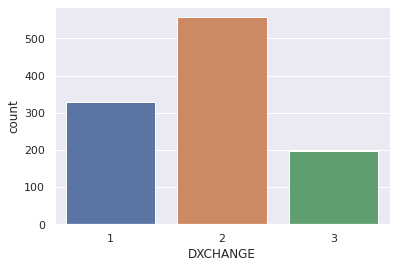

In [ ]:
# 클래스 분포 알아보기
## 불균형한 클래스 일 경우 훈련하는 동안 학습 알고리즘 자체에 영향을 미치기 때문에 처리를 해줘야한다.
## 정확도 대신 정밀고, 재현율, ROC 곡선을 사용. 혹은 SMOTE 사용.

import seaborn as sns

sns.countplot(y_cls['DXCHANGE'])

## DXCHANGE: clinical label (1-CN, 2-MCI, 3-AD)

In [ ]:
# class label count

y_cls['DXCHANGE'].value_counts()

2    557
1    329
3    198
Name: DXCHANGE, dtype: int64

* Dummy value 생성
  * One-Hot encoding

In [ ]:
y_dm = pd.get_dummies(y_cls['DXCHANGE'], drop_first = True)

In [ ]:
y_dm

,2,3
1088,1,0
921,1,0
1335,1,0
1130,1,0
652,1,0
...,...,...
763,1,0
835,1,0
1216,0,0
559,1,0


### Check-point : 08

> 원본 데이터에서 클래스 레이블은 순서가 없는 label이지만 정수 [1,2,3]으로 표현되어 있기 때문에 컴퓨터 입장에서는 순서가 있는 레이블로 인식할 수 있다. 

 > 그래서 더미변수를 추가하여 [0,1]만 가지고 있는 클래스 레이블로 수정하였다. --> 원/핫 인코딩

##**모델 적용**
* 결정 트리
* 랜덤 포레스트
* knn

*Decision Tree*

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_cls = DecisionTreeClassifier(criterion = 'gini',
                              max_depth = 7,
                              random_state=0)
tree_cls.fit(X_std, y_dm)
y_tree_cls = tree_cls.predict(X_std)

In [ ]:
## 평균 오차 제곱

print('훈련 MSE : %.3f' %mean_squared_error(y_dm, y_tree_cls))

## 결정 계수
print('훈련 R2 : %.3f' %r2_score(y_dm, y_tree_cls))

훈련 MSE : 0.138
훈련 R2 : 0.373


> 결정 트리로 분류를 하였을 때 MSE는 0.138, R^2는 0.373(약 37%의 설명력)이 나왔다. 

In [ ]:
parameters = {
    'max_depth': [1, 3, 5, 7, 9]
}

gs = GridSearchCV(DecisionTreeClassifier(random_state = 1), 
                  param_grid = parameters, 
                  cv = 3,
                  return_train_score = True)


tree_scores = cross_val_score(gs,
                         X = X_std,
                         y = y_dm,
                         cv = 10,
                         n_jobs = 1)

In [ ]:
print("CV tree 정확도 : %s" %tree_scores)
print("CV tree : %.3f +/- %.3f" %(np.mean(tree_scores), np.std(tree_scores)))

CV tree 정확도 : [0.51376147 0.42201835 0.42201835 0.50458716 0.55555556 0.53703704
 0.50925926 0.50925926 0.44444444 0.49074074]
CV tree : 0.491 +/- 0.044


In [ ]:
gs.fit(X_std, y_dm)
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 7}
0.5239665753508517


> 결정트리를 그리드서치와 k-겹 교차 검증을 겹친 중첩 교차 검증을 하였을 때 max_depth가 7일 때 가장 좋은 성능이 나왔으며 각 k-fold 검증의 평균은 0.49이고 분산은 +/-0.044 이하였다.

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_cls = RandomForestClassifier(criterion = 'gini',
                                random_state = 1,
                                max_depth = 7)

forest_cls.fit(X = X_std, y = y_dm)
y_forest_cls = forest_cls.predict(X_std)

In [ ]:
## 평균 오차 제곱

print('훈련 MSE : %.3f' %mean_squared_error(y_dm, y_forest_cls))

## 결정 계수
print('훈련 R2 : %.3f' %r2_score(y_dm, y_forest_cls))

print("forest 정확도: {:.3f}".format(forest_cls.score(X_std, y_dm)))

훈련 MSE : 0.062
훈련 R2 : 0.669
forest 정확도: 0.881


In [ ]:
parameters = {
    'max_depth': [1, 3, 5, 7, 9]
}

gs_forest_cls = GridSearchCV(RandomForestClassifier(random_state = 1), 
                  param_grid = parameters, 
                  cv = 3,
                  return_train_score = True)

forest_scores = cross_val_score(gs_forest_cls,
                         X = X_std,
                         y = y_dm,
                         cv = 10,
                         n_jobs = -1)

In [ ]:
print("CV forest 정확도 점수 : %s" %forest_scores)
print("CV forest : %.3f +/- %.3f" %(np.mean(forest_scores), np.std(forest_scores)))

CV forest 정확도 점수 : [0.52293578 0.50458716 0.46788991 0.4587156  0.4537037  0.5
 0.44444444 0.44444444 0.5462963  0.46296296]
CV forest : 0.481 +/- 0.034


In [ ]:
gs_forest_cls.fit(X_std, y_dm)
print(gs_forest_cls.best_params_)
print(gs_forest_cls.best_score_)

{'max_depth': 7}
0.49720696040770723


> 랜덤 포레스트를 중첩 교차 검증하였을 때 평균적으로 정확도가 0.481이 나왔다. 

 > 그리드 서치로 구한 best_params은 max_depth = 7이고, best_score = 0.49가 나왔습니다.



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_cls = KNeighborsClassifier(n_neighbors = 6, 
                           p = 2)

knn_cls.fit(X_std, y_dm)

y_knn_cls = knn_cls.predict(X_std)

In [ ]:
## 평균 오차 제곱

print('훈련 MSE : %.3f' %mean_squared_error(y_dm, y_knn_cls))

## 결정 계수
print('훈련 R2 : %.3f' %r2_score(y_dm, y_knn_cls))

훈련 MSE : 0.254
훈련 R2 : -0.229


In [ ]:
parameters = {
    'n_neighbors': [1, 3, 5, 7, 9]
}

gs = GridSearchCV(KNeighborsClassifier(p=2), 
                  param_grid = parameters, 
                  cv = 3,
                  return_train_score = True)

knn_scores = cross_val_score(gs,
                         X = X_std,
                         y = y_dm,
                         cv = 5,
                         n_jobs = -1)

print("CV knn 정확도 점수 : %s" %knn_scores)
print("CV knn : %.3f +/- %.3f" %(np.mean(knn_scores), np.std(knn_scores)))

CV knn 정확도 점수 : [0.43317972 0.48847926 0.46543779 0.42396313 0.4537037 ]
CV knn : 0.453 +/- 0.023


In [ ]:
gs.fit(X_std, y_dm)
print(gs.best_params_)
print(gs.best_score_)

{'n_neighbors': 9}
0.4640220790417451


> KNN에 중첩 교차 검증을 한 결과를 봤을 때는 이웃의 수가 9일 때가 가장 좋은 성능을 나타낸다고 나왔다.

PCA


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.47426221, 0.06953532, 0.04569624, 0.03238332, 0.02465599,
       0.01961195, 0.01749004, 0.01622259, 0.01555707, 0.01290311,
       0.01220013, 0.01148737, 0.0110054 , 0.01001431, 0.00970544,
       0.00919276, 0.00898888, 0.00851445, 0.00834121, 0.00801155,
       0.00748759, 0.00693108, 0.00687277, 0.00660932, 0.0064193 ,
       0.00623351, 0.00599446, 0.00585101, 0.00547776, 0.0054041 ,
       0.00524592, 0.00494372, 0.00488012, 0.00471285, 0.00461003,
       0.0045282 , 0.00413385, 0.00402724, 0.00383546, 0.0038008 ,
       0.00370947, 0.00366313, 0.00345978, 0.0033682 , 0.00324912,
       0.00303201, 0.00301783, 0.00294265, 0.00279185, 0.00271652,
       0.0026544 , 0.00259688, 0.00254083, 0.0024201 , 0.00237782,
       0.00225621, 0.002049  , 0.00199034, 0.0019113 , 0.00177637,
       0.00167284, 0.00163444, 0.0014839 , 0.00141416, 0.00127157,
       0.00120364, 0.00112007, 0.00096138, 0.00093575])

> 주성분 분석을 사용하여 클래스 별 분류를 유도하려고 하였지만 생각보다 더 분산이 나오지 않아 주성분 분석은 사용하지 않았다. 

# Task 2 최종 결과
> DXCHANGE : 랜덤 포레스트(max_depth = 7)

# **Test dataset**

In [ ]:
# Load test dataset
test_data

,RID,DXCHANGE,AGE,MMSE,ADAS13,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
1169,4401,1,67.5,30,5.00,2.333,2.701,2.741,2.614,2.477,1.603,1.872,2.412,2.360,2.399,2.530,2.252,2.641,2.098,2.833,2.468,3.660,2.431,,2.953,2.982,2.445,2.439,2.419,2.027,3.547,2.637,2.808,2.350,2.714,2.517,2.240,2.551,2.103,2.211,2.874,2.335,2.699,2.446,2.712,2.284,1.633,2.038,2.508,2.611,2.318,2.747,2.166,2.730,2.154,2.756,2.386,4.095,2.354,,2.612,2.552,2.467,1.970,3.615,2.564,2.832,2.302,2.973,2.139,2.322,2.496,2.095,2.106,3.019
942,4216,2,56.4,29,18.00,2.345,3.024,2.372,2.672,2.386,1.627,1.893,2.643,2.298,2.479,2.843,2.220,2.445,2.113,2.797,2.486,3.565,2.488,,3.026,3.195,2.614,2.791,2.447,1.911,3.519,2.750,2.875,2.446,2.914,2.891,2.181,2.561,2.129,2.265,2.890,2.290,3.066,2.574,2.581,2.528,1.529,1.859,2.754,2.471,2.476,2.910,2.347,2.570,2.162,2.818,2.373,3.642,2.463,,2.658,2.263,2.473,2.046,3.328,2.690,2.769,2.462,3.025,2.765,2.332,2.511,2.198,2.324,3.014
1182,294,2,79.2,26,16.00,1.703,2.383,2.116,2.212,1.927,1.127,1.549,2.

## **Test data : Refine**

In [ ]:
test = test_data.copy()

In [ ]:
# 01. 변수 제거 : RID 
test.drop("RID", axis = 1, inplace = True)

In [ ]:
# 02. 결측치 처리 : 행/열 제거
test.replace(' ', np.nan, inplace = True)
test['ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'] = test['ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'].astype('float')
test['ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'] = test['ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'].astype('float')

In [ ]:
test.dropna(axis = 0, inplace = True, subset = ['ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 
                                                 'ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16', 
                                                 'ADAS13'])

In [ ]:
test = test.drop(['ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
                    'ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16'], axis = 1)

In [ ]:
# test.info()

In [ ]:
# 03. 레이블 분리
y_test_reg = test[["MMSE", "ADAS13"]].copy()
y_test_cls = test[["DXCHANGE"]].copy()
X_test = test.drop(['MMSE', "ADAS13", "DXCHANGE"], axis = 1, inplace = False)

In [ ]:
y_test_dm = pd.get_dummies(y_test_cls['DXCHANGE'], drop_first = True)

In [ ]:
# 04. 정규화 : StandardScaler

# std_test = StandardScaler()
stdsc = StandardScaler()
test_std = stdsc.fit_transform(X_test)

## 모델 적용

In [ ]:
## 회귀 모델 : RandomForest

test_reg = gs_forest.predict(test_std)

In [ ]:
## 분류 모델 :  RandomForest

test_cls = gs_forest_cls.predict(test_std)

### 회귀 모델 : 성능 평가
* 평균 오차 제곱(MSE)
* 결정 계수(R-squared)

In [ ]:
## 평균 오차 제곱

print('훈련 MSE : %.3f' %mean_squared_error(y_test_reg, test_reg))
print("\n")

## 결정 계수

print('훈련 R2 : %.3f' %r2_score(y_test_reg, test_reg))

훈련 MSE : 29.072


훈련 R2 : 0.443


### 분류 모델 : 성능 평가
* 평균 오차 제곱(MSE)
* 결정 계수(R-squared)



In [ ]:
print('훈련 MSE : %.3f' %mean_squared_error(y_test_dm, test_cls))
print("\n")

## 결정 계수

print('훈련 R2 : %.3f' %r2_score(y_test_dm, test_cls))

훈련 MSE : 0.285


훈련 R2 : -0.328
